# Chapter 1.3 — Positional Encoding: Teaching Models About Order

*How models understand sequence and position in language*

Companion article: https://medium.com/@vadidsadikshaikh/chapter-1-3-positional-encoding-teaching-models-about-order-fd56cf3649e9
Reference: Sebastian Raschka, *Build a Large Language Model (From Scratch)*

Purpose: Understand why positional information is crucial for LLMs and implement sinusoidal positional encoding from scratch.

## Why Positional Encoding?

After tokenization and embeddings, our model knows *what* the words mean — but not *in what order* they appear.

For example:
- "The cat chased the dog"
- "The dog chased the cat"

Without positional encoding, these two sentences look identical to the model. Transformers solve this by adding **position-based information** to each token embedding.

We’ll now implement the **sinusoidal positional encoding** used in the original *Attention Is All You Need* paper.

In [1]:
# Imports
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)

## Sinusoidal Positional Encoding — Formula

For each position $pos$ and dimension $i$:

$$
PE(pos, 2i) = \sin\left(\frac{pos}{10000^{2i/d_{model}}}\right)\\
PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i/d_{model}}}\right)
$$

- $pos$: position in sequence (0, 1, 2, ...)
- $i$: dimension index
- $d_{model}$: embedding dimension size

This creates a **unique pattern** for each position that helps the model infer order and relative distance between tokens.

In [2]:
def positional_encoding(seq_len, d_model):
    # Create matrix of shape (seq_len, d_model)
    positions = torch.arange(seq_len).unsqueeze(1)  # (seq_len, 1)
    dims = torch.arange(d_model).unsqueeze(0)       # (1, d_model)

    # Compute angle rates using the formula from the paper
    angle_rates = positions / torch.pow(10000, (2 * (dims // 2)) / d_model)

    # Apply sin to even indices, cos to odd indices
    encoding = torch.zeros(seq_len, d_model)
    encoding[:, 0::2] = torch.sin(angle_rates[:, 0::2])
    encoding[:, 1::2] = torch.cos(angle_rates[:, 1::2])

    return encoding

In [3]:
# Example usage
seq_len = 20      # Number of tokens in sequence
d_model = 128     # Embedding dimension
pos_enc = positional_encoding(seq_len, d_model)

print("Positional Encoding shape:", pos_enc.shape)
print("First row (pos 0, first 10 dims):", pos_enc[0, :10])

Positional Encoding shape: torch.Size([20, 128])
First row (pos 0, first 10 dims): tensor([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])


## Visualizing Positional Encoding Patterns

Each dimension in the embedding vector has a different sinusoidal frequency. Together, they encode position uniquely and continuously.

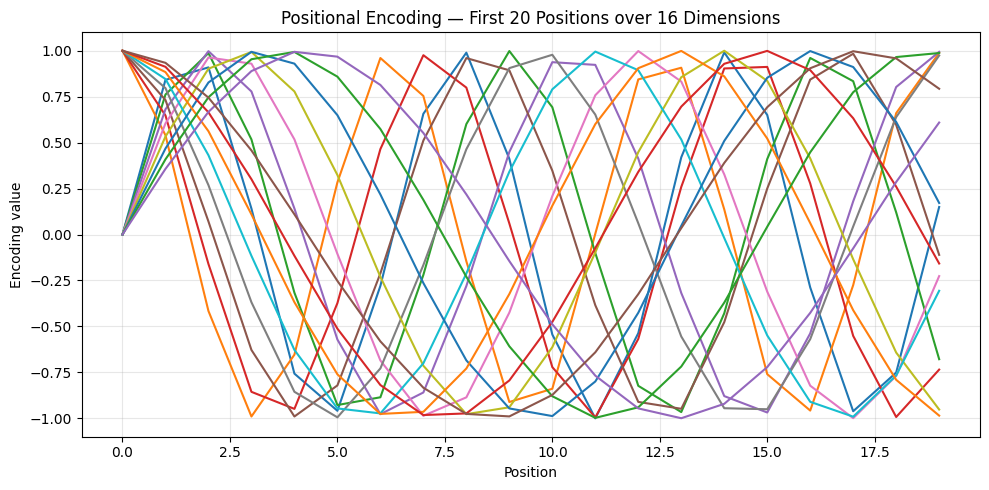

In [4]:
plt.figure(figsize=(10, 5))
plt.title('Positional Encoding — First 20 Positions over 16 Dimensions')
plt.xlabel('Position')
plt.ylabel('Encoding value')
plt.plot(pos_enc[:, :16].numpy())
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Adding Positional Encoding to Token Embeddings

The positional encodings are **added elementwise** to the token embeddings:

$$
z = x + PE
$$

where $x$ are the token embeddings, and $PE$ are the positional encodings.

This ensures that the model considers *both meaning and order* while processing sequences.

In [5]:
# Example combining embeddings + positional encodings
embedding_dim = d_model
dummy_embeddings = torch.rand(seq_len, embedding_dim)

combined = dummy_embeddings + pos_enc
print("Combined embeddings shape:", combined.shape)

Combined embeddings shape: torch.Size([20, 128])


## Key Insights

- Positional encodings provide transformers with awareness of order.
- Sinusoidal functions allow generalization to longer sequences unseen during training.
- These encodings are fixed — not learned — but can also be replaced by **learnable embeddings** in advanced models.

**Next:** Chapter 2 — Attention Is All You Need — how transformers learn to focus on context and relationships between tokens.